<a href="https://colab.research.google.com/github/Mauricio8583/DataAnalyticProject/blob/main/Global_plastic_waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-e3f31332bf3b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y=metric, palette=color_palette)


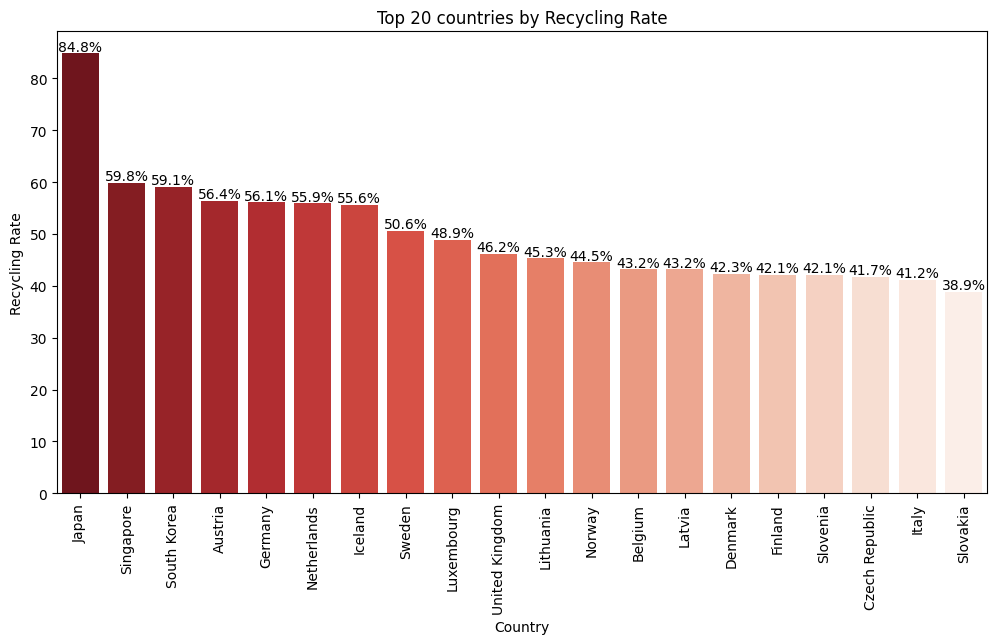

<ipython-input-16-e3f31332bf3b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y=metric, palette=color_palette)


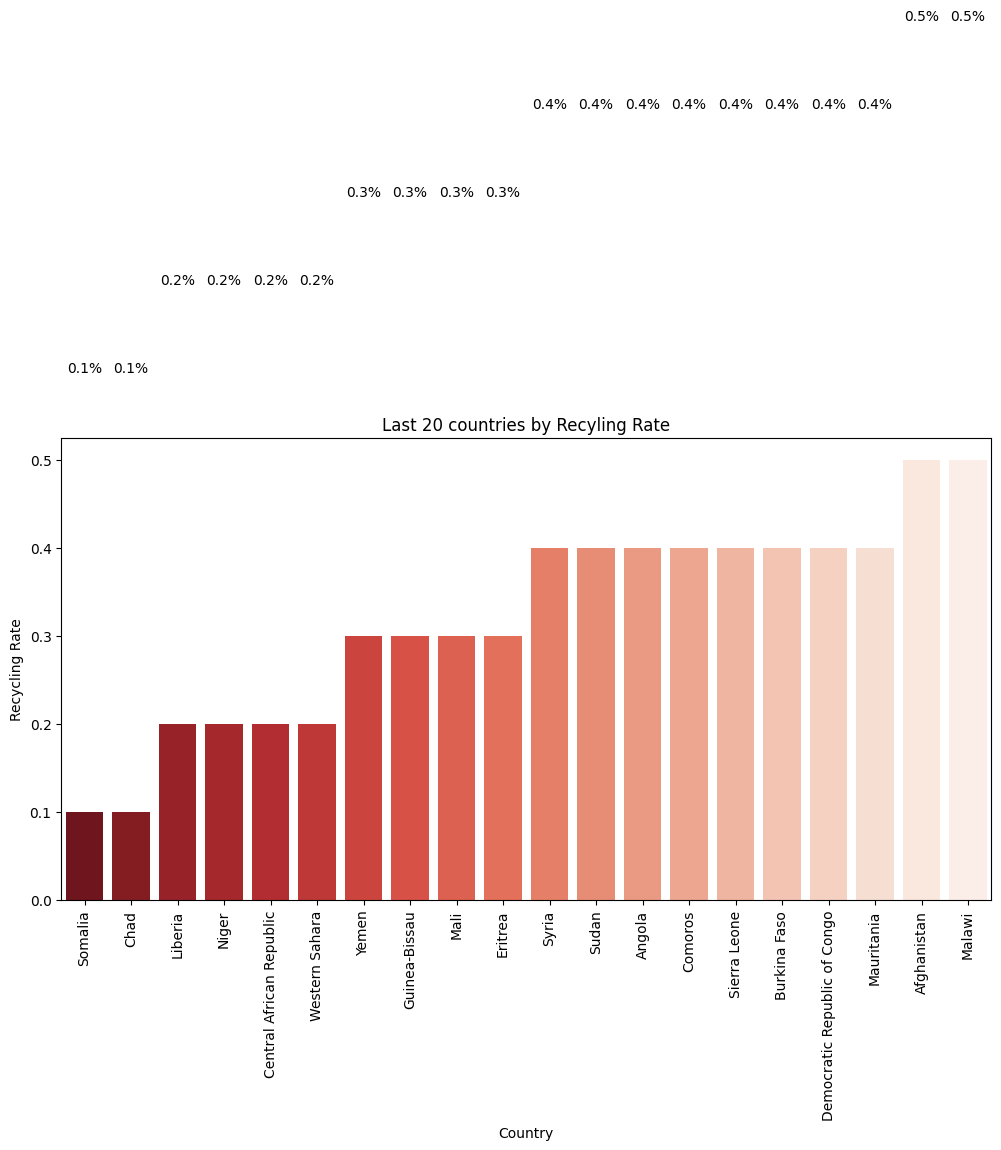

<ipython-input-16-e3f31332bf3b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y=metric, palette=color_palette)


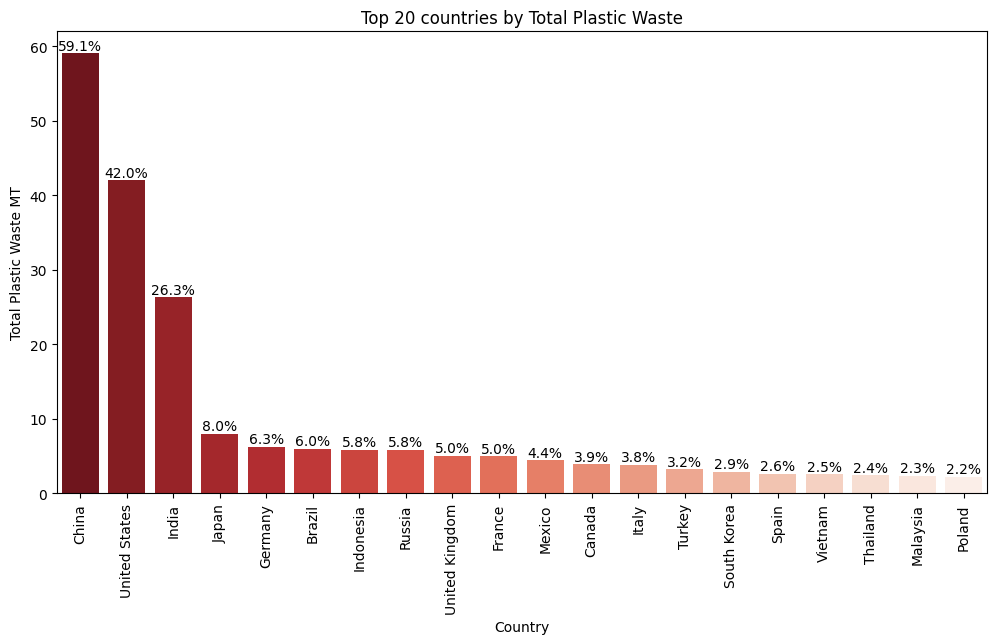

<ipython-input-16-e3f31332bf3b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y=metric, palette=color_palette)


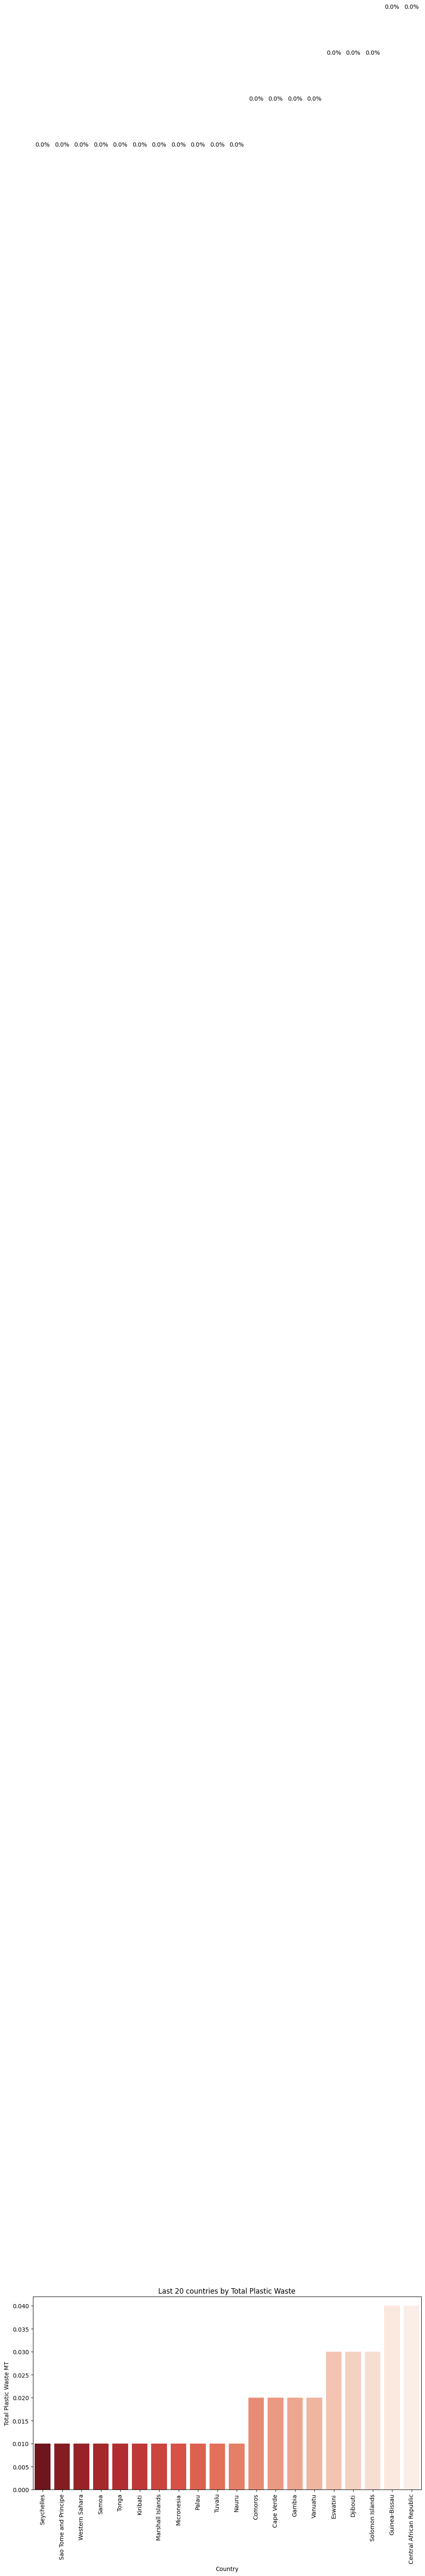

<ipython-input-16-e3f31332bf3b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y='Recycling_Rate', palette=colors)


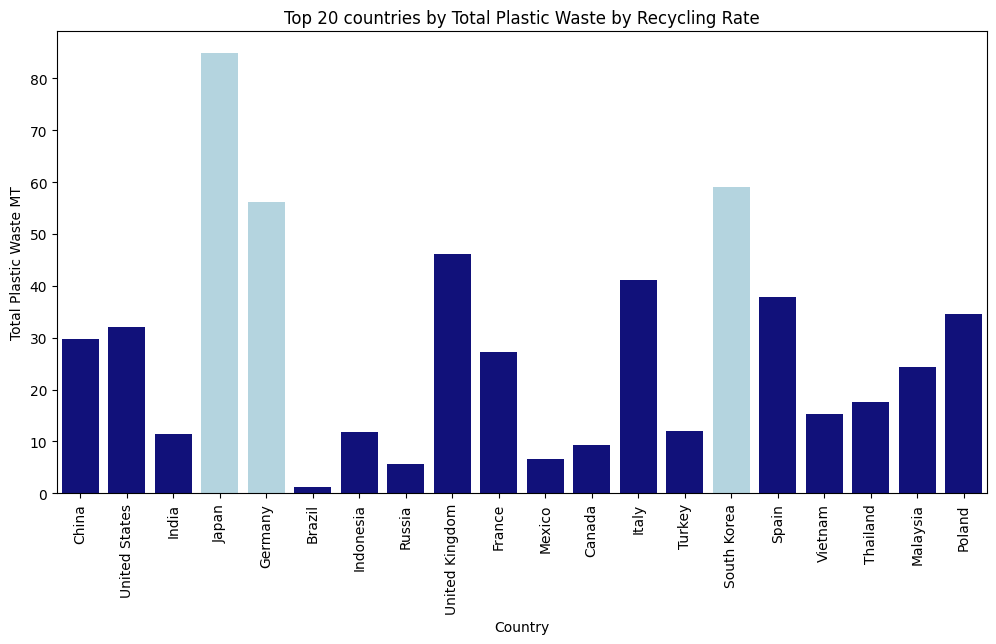

<ipython-input-16-e3f31332bf3b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, x='Country', y='Recycling_Rate', palette=colors)


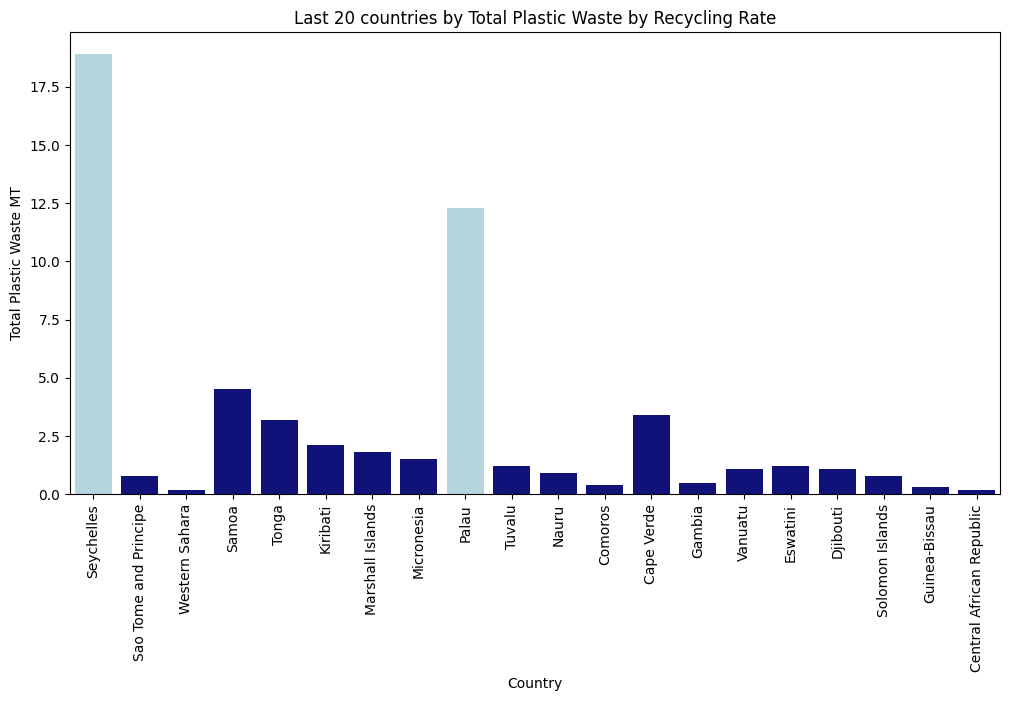

<ipython-input-16-e3f31332bf3b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_five_high_risk, x='Country', y='Total_Plastic_Waste_MT', palette='magma_r', ax=axes[0])
<ipython-input-16-e3f31332bf3b>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_five_medium_risk, x='Country', y='Total_Plastic_Waste_MT', palette='Set1_r', ax=axes[1])


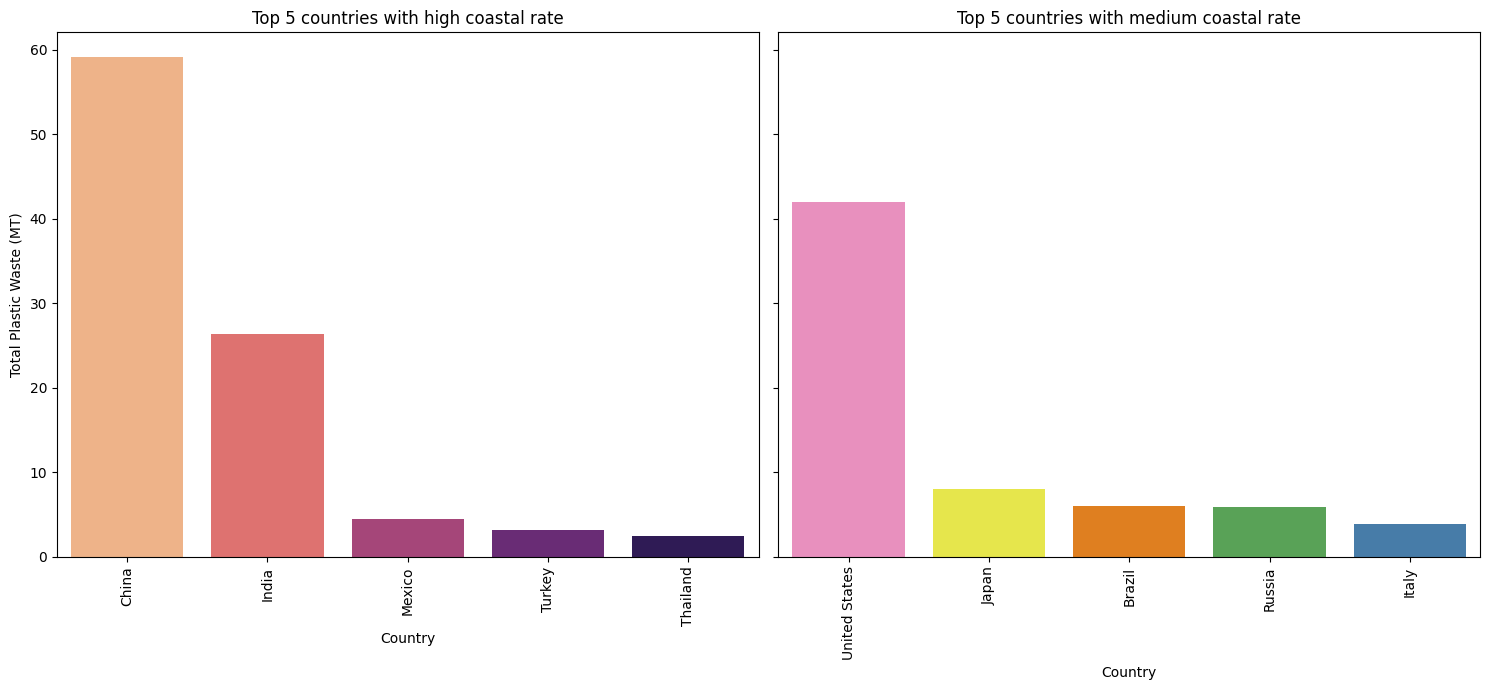

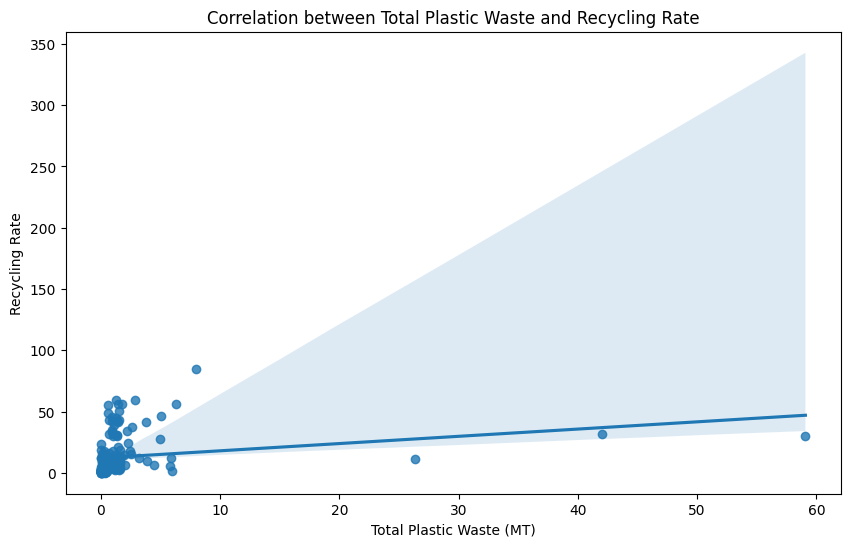

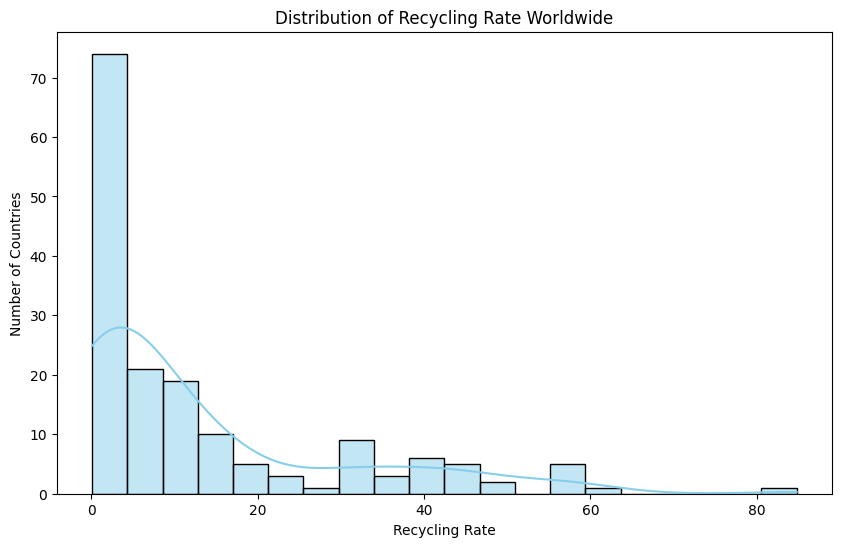

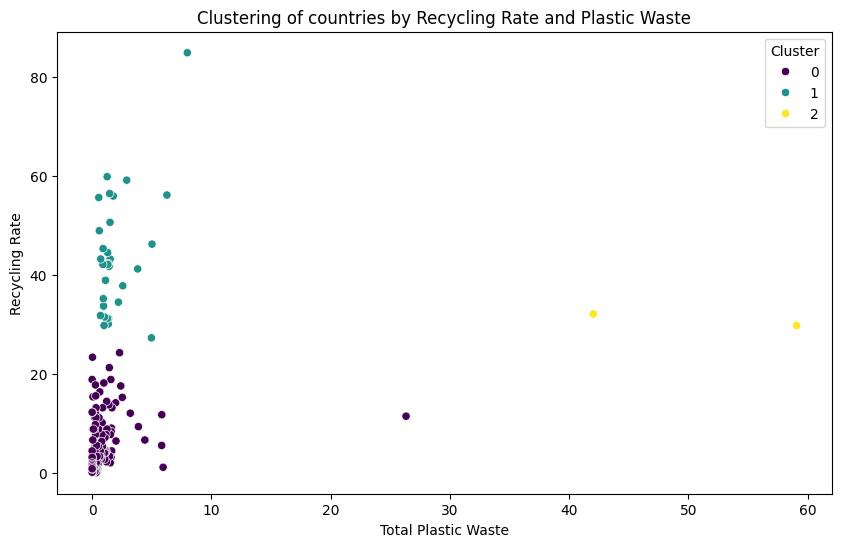

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster

# Getting dataset info
dataset = pd.read_csv('Plastic_Waste_With_Coordinates.csv')
dataset.head()

# Top 20 and last 20 countries by Recycling rate
def plot_top_last_countries(data, metric, n = 20, top = True, title = '', color_palette = 'Reds_r'):
  countries = data.nlargest(n, metric) if top else data.nsmallest(n, metric)
  plt.figure(figsize=(12, 6))
  sns.barplot(data=countries, x='Country', y=metric, palette=color_palette)
  plt.title(title)
  for i, v in enumerate(countries[metric]):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha = 'center')
  plt.xlabel('Country')
  plt.ylabel(metric.replace('_', ' '))
  plt.xticks(rotation=90)
  plt.show()

plot_top_last_countries(dataset, 'Recycling_Rate', title='Top 20 countries by Recycling Rate')
plot_top_last_countries(dataset, 'Recycling_Rate', top = False, title='Last 20 countries by Recyling Rate')

# Top 20 and last 20 countries by Total Plastic Wasye
plot_top_last_countries(dataset, 'Total_Plastic_Waste_MT', title='Top 20 countries by Total Plastic Waste')
plot_top_last_countries(dataset, 'Total_Plastic_Waste_MT', top = False, title='Last 20 countries by Total Plastic Waste')

# Top 20 and last 20 countries by Total Plastic Wasye with Recycle Rate proportion
def plot_top_last_countries_with_recyling_rate(data, metric, n = 20, top = True, title = ''):
  countries = data.nlargest(n, metric) if top else data.nsmallest(n, metric)
  colors = ['#00008B' if rate <=50 else '#ADD8E6' for rate in countries['Recycling_Rate']] if top else ['#00008B' if rate <=10 else '#ADD8E6' for rate in countries['Recycling_Rate']]
  plt.figure(figsize=(12, 6))
  sns.barplot(data=countries, x='Country', y='Recycling_Rate', palette=colors)
  plt.title(title)
  plt.xlabel('Country')
  plt.ylabel(metric.replace('_', ' '))
  plt.xticks(rotation=90)
  plt.show()

plot_top_last_countries_with_recyling_rate(dataset, 'Total_Plastic_Waste_MT', title = 'Top 20 countries by Total Plastic Waste by Recycling Rate')
plot_top_last_countries_with_recyling_rate(dataset, 'Total_Plastic_Waste_MT', top = False, title = 'Last 20 countries by Total Plastic Waste by Recycling Rate')

# Countries with high and medium coastal risk
top_five_high_risk = dataset[dataset['Coastal_Waste_Risk'] == 'High'].nlargest(5, 'Total_Plastic_Waste_MT')
top_five_medium_risk = dataset[dataset['Coastal_Waste_Risk'] == 'Medium'].nlargest(5, 'Total_Plastic_Waste_MT')

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# High Risk
sns.barplot(data=top_five_high_risk, x='Country', y='Total_Plastic_Waste_MT', palette='magma_r', ax=axes[0])
axes[0].set_title('Top 5 countries with high coastal rate')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Plastic Waste (MT)')
axes[0].tick_params(axis='x', rotation=90)

# Medium Risk
sns.barplot(data=top_five_medium_risk, x='Country', y='Total_Plastic_Waste_MT', palette='Set1_r', ax=axes[1])
axes[1].set_title('Top 5 countries with medium coastal rate')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Plastic Waste (MT)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Correlation between total plastic waste and recycling rate
plt.figure(figsize=(10, 6))
sns.regplot(data = dataset, x = 'Total_Plastic_Waste_MT', y = 'Recycling_Rate')
plt.title('Correlation between Total Plastic Waste and Recycling Rate')
plt.xlabel('Total Plastic Waste (MT)')
plt.ylabel('Recycling Rate')
plt.show()

# Distribution of Recycling Rates worldwide
plt.figure(figsize = (10, 6))
sns.histplot(dataset['Recycling_Rate'], bins = 20, kde = True, color = 'skyblue')
plt.title('Distribution of Recycling Rate Worldwide')
plt.xlabel('Recycling Rate')
plt.ylabel('Number of Countries')
plt.show()

# Classification of countries with cluster
features = dataset[['Recycling_Rate', 'Total_Plastic_Waste_MT']].dropna()
kmeans = KMeans(n_clusters = 3)
dataset['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize = (10, 6))
sns.scatterplot(data = dataset, x = 'Total_Plastic_Waste_MT', y = 'Recycling_Rate', hue = 'Cluster', palette = 'viridis')
plt.title('Clustering of countries by Recycling Rate and Plastic Waste')
plt.xlabel('Total Plastic Waste')
plt.ylabel('Recycling Rate')
plt.show()


#geolocator = Nominatim(user_agent = 'geoapi')
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)

#dataset['Latitude'] = None
#dataset['Longitude'] = None
                                            # Code used to create the coordinates of the countries, originaly wasn´t in the dataset
#for idx, row in dataset.iterrows():
 # location = geocode(row['Country'])
  #if location:
   # dataset.at[idx, 'Latitude'] = location.latitude
    #dataset.at[idx, 'Longitude'] = location.longitude

#dataset.to_csv('Plastic_Waste_With_Coordinates.csv', index = False)

# Geography classification
maping = folium.Map(location = [20, 0], zoom_start = 2)
marker_cluster = MarkerCluster().add_to(maping)

for idx, row in dataset.iterrows():
  country = row['Country']
  latitude = row['Latitude']
  longitude = row['Longitude']
  recycling_rate = row['Recycling_Rate']
  total_waste = row['Total_Plastic_Waste_MT']

  popup_text = f"""<strong>{country}</strong><br>
  Recycling Rate: {recycling_rate}%<br>
  Total Plastic Waste: {total_waste}
  """
  folium.Circle(location = (latitude, longitude), radius = total_waste * 10, color = 'blue' if recycling_rate > 50 else 'red', fill = True,
  fill_color = 'blue' if recycling_rate > 50 else 'red', fill_opacity = 0.6, popup = popup_text).add_to(marker_cluster)

#maping.save('plastic_waste_map.html')